## DE Project 


In [1]:
import pandas as pd

In [2]:
solar = pd.read_csv("ProTwo.csv")

In [3]:
solar.head()

,System Size(KWp),EB Tariff(RS/kwh),System Cost,Generation/efficiency,Asset Management Cost(Inr/kwp),Commission In Time (Y),PPA Tenure(Y),IRR,Solar_price
0,600.0,9.63,47136,1336,450.00,0.500,10,19.52,7.20
1,830.0,7.09,47043,1380,1100.00,0.500,25,17.31,5.30
2,100.0,9.54,46658,1462,862.60,0.333,15,15.13,5.20
3,1518.0,10.00,48399,1387,1144.27,0.500,25,16.59,4.90
4,102.0,16.76,55325,1387,2003.53,0.333,10,17.92,9.25


In [4]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   System Size(KWp)                66 non-null     float64
 1   EB Tariff(RS/kwh)               66 non-null     float64
 2   System Cost                     66 non-null     int64  
 3   Generation/efficiency           66 non-null     int64  
 4   Asset Management Cost(Inr/kwp)  66 non-null     float64
 5   Commission In Time (Y)          66 non-null     float64
 6   PPA Tenure(Y)                   66 non-null     int64  
 7   IRR                             66 non-null     float64
 8   Solar_price                     66 non-null     float64
dtypes: float64(6), int64(3)
memory usage: 4.8 KB


In [5]:
solar.describe()

,System Size(KWp),EB Tariff(RS/kwh),System Cost,Generation/efficiency,Asset Management Cost(Inr/kwp),Commission In Time (Y),PPA Tenure(Y),IRR,Solar_price
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,993.084091,10.821061,50778.075758,1373.469697,1060.348939,0.515136,15.409091,16.503788,6.640455
std,2554.699699,4.049853,7197.149843,80.084613,564.154879,0.137044,5.654072,1.880646,1.519540
min,21.800000,5.640000,40046.000000,1144.000000,141.500000,0.250000,7.000000,9.470000,4.200000
25%,119.250000,7.522500,46521.500000,1330.500000,600.000000,0.500000,10.000000,15.400000,5.547500
50%,217.500000,9.630000,49907.000000,1376.500000,1075.900000,0.500000,15.000000,16.795000,6.300000
75%,885.000000,14.855000,54654.750000,1420.500000,1157.367500,0.500000,20.000000,17.665000,7.875000
max,15000.000000,21.000000,76800.000000,1550.000000,3295.280000,1.000000,25.000000,21.520000,11.450000


## Train-Test Splitting

In [6]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices]

In [7]:
train_set, test_set = split_train_test(solar, 0.2)

[54 62  0 45  5 63 16 12 65 30 33  9 41 13 34 25  3 17 40  8  6 28  4 48
 36 19 56 59 58 50 31 44 64 15 27 26 24 47 11 32 61 46 37 29 43 49  1 21
  2 53 39 35 52 23 55 10 22 18 57 38 20 60  7 42 14 51]


In [8]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 53
Rows in test set: 13



In [9]:
solar.shape

(66, 9)

In [10]:
print(solar.columns)

Index(['System Size(KWp)', 'EB Tariff(RS/kwh)', 'System Cost',
       'Generation/efficiency', 'Asset Management Cost(Inr/kwp)',
       'Commission In Time (Y)', 'PPA Tenure(Y)', 'IRR', 'Solar_price'],
      dtype='object')


In [11]:
features = ["System Size(KWp)", "EB Tariff(RS/kwh)", "Generation/efficiency", "System Cost", "Asset Management Cost(Inr/kwp)",
            "Commission In Time (Y)", "PPA Tenure(Y)", "IRR"]
x= solar[features]
print(x.head())

   System Size(KWp)  EB Tariff(RS/kwh)  Generation/efficiency  System Cost  \
0             600.0               9.63                   1336        47136   
1             830.0               7.09                   1380        47043   
2             100.0               9.54                   1462        46658   
3            1518.0              10.00                   1387        48399   
4             102.0              16.76                   1387        55325   

   Asset Management Cost(Inr/kwp)  Commission In Time (Y)  PPA Tenure(Y)  \
0                          450.00                   0.500             10   
1                         1100.00                   0.500             25   
2                          862.60                   0.333             15   
3                         1144.27                   0.500             25   
4                         2003.53                   0.333             10   

     IRR  
0  19.52  
1  17.31  
2  15.13  
3  16.59  
4  17.92  


In [13]:
y = solar['Solar_price']  
print(y.head())

0    7.20
1    5.30
2    5.20
3    4.90
4    9.25
Name: Solar_price, dtype: float64


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your data from the CSV file
solar = pd.read_csv("ProTwo.csv")

# Define your features and target variable
features = ["System Size(KWp)", "EB Tariff(RS/kwh)", "Generation/efficiency", "System Cost", "Asset Management Cost(Inr/kwp)",
            "Commission In Time (Y)", "PPA Tenure(Y)", "IRR"]
# Create input features (X) and target variable (y)
X = solar[features]
y = solar["Solar_price"]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model with the training data
model.fit(X_train, y_train)

# Make predictions using the test data
predictions = model.predict(X_test)

# Calculate and print the Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Now you can use the trained model to make predictions on new data
# For example, if you have new input features in a variable called 'new_data':
# new_predictions = model.predict(new_data)

Mean Squared Error: 0.4168023926109073


In [16]:
accuracy = model.score(X_test, y_test)
print("Model Accuracy on Test Data:", accuracy)

Model Accuracy on Test Data: 0.7269508696621506


In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle


solar = pd.read_csv('ProTwo.csv')

# Define your features and target variable
features = ["System Size(KWp)", "EB Tariff(RS/kwh)", "Generation/efficiency", "System Cost", "Asset Management Cost(Inr/kwp)",
            "Commission In Time (Y)", "PPA Tenure(Y)", "IRR"]

X = solar[features]  # Features
y = solar['Solar_price']  # Target variable
    
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy on Test Data: {accuracy}')

# Save the trained model to a .pkl file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
# Assume X_new represents your new data for prediction (features for which you want to predict solar prices)
X_new = {
    "System Size(KWp)": [1000],
    "EB Tariff(RS/kwh)": [7.31],
    "Generation/efficiency": [1513],
    "System Cost": [53714],
    "Asset Management Cost(Inr/kwp)": [1248.22],
    "Commission In Time (Y)": [0.5],
    "PPA Tenure(Y)": [20],
    "IRR": [15.07],
}

# Convert the dictionary to a pandas DataFrame
X_new = pd.DataFrame(X_new)

# Make predictions using the loaded model
predicted_solar_prices = model.predict(X_new.values.reshape(1, -1))

# The variable 'predicted_solar_prices' now contains the predicted solar prices for the new data
print(predicted_solar_prices)


Model Accuracy on Test Data: 0.7269508696621506
[5.61602613]


C:\Users\Nishith\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


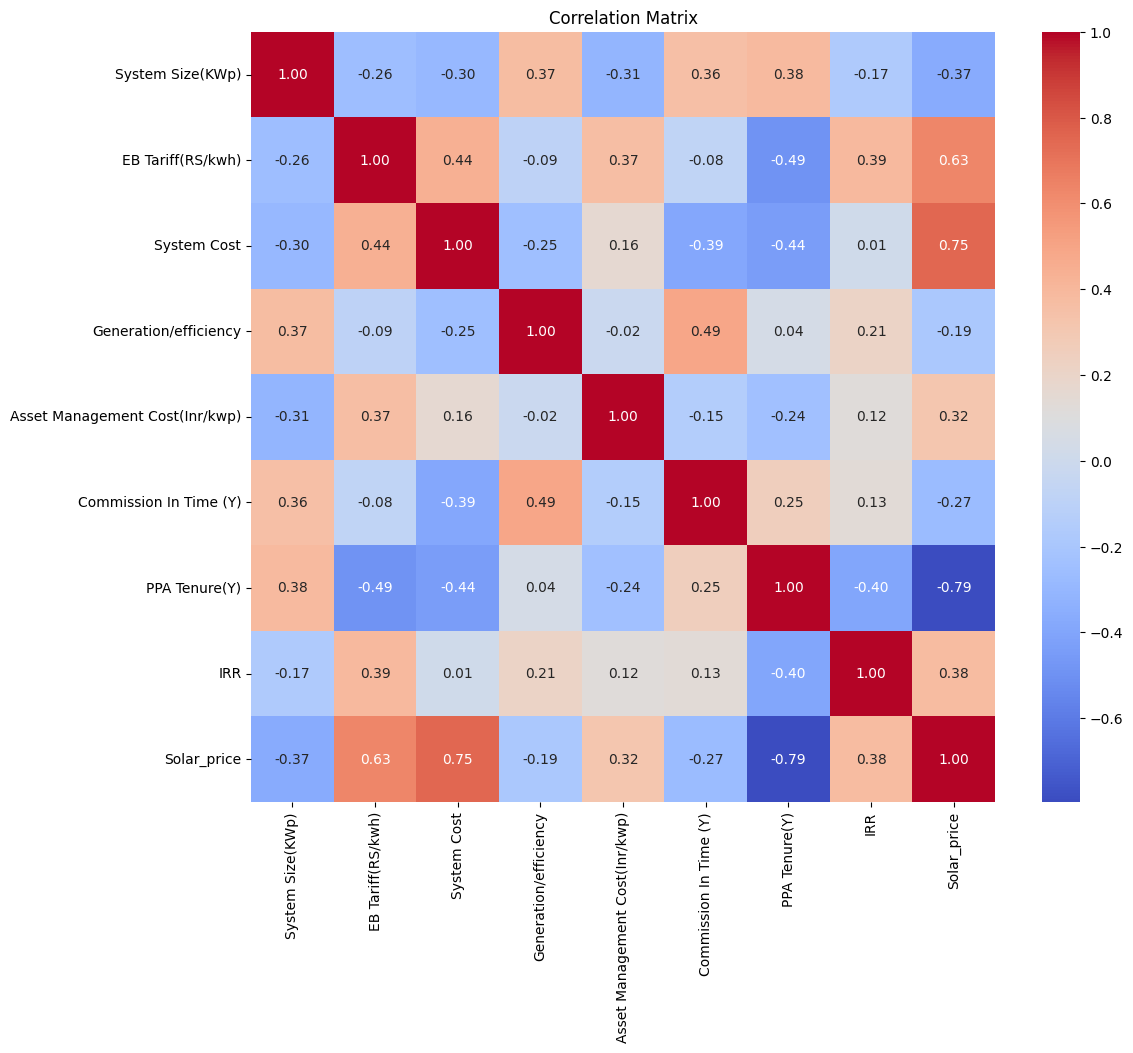

In [22]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset into a Pandas DataFrame
# Replace 'your_dataset.csv' with the actual file path or data source
solar = pd.read_csv('ProTwo.csv')

# Compute the correlation matrix
correlation_matrix = solar.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [23]:
corr_matrix = solar.corr()
corr_matrix['System Size(KWp)'].sort_values(ascending=False)

System Size(KWp)                  1.000000
PPA Tenure(Y)                     0.383334
Generation/efficiency             0.371385
Commission In Time (Y)            0.358328
IRR                              -0.168073
EB Tariff(RS/kwh)                -0.256440
System Cost                      -0.296848
Asset Management Cost(Inr/kwp)   -0.311181
Solar_price                      -0.373323
Name: System Size(KWp), dtype: float64

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
import pickle

# Load your dataset
solar = pd.read_csv('ProTwo.csv')

# Define your features and target variables
features = ["System Size(KWp)", "EB Tariff(RS/kwh)", "Generation/efficiency", "System Cost", "Asset Management Cost(Inr/kwp)",
            "Commission In Time (Y)", "IRR"]


X = solar[features]  # Features
y = solar[['PPA Tenure(Y)', 'Solar_price']]  # Target variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
base_model = LinearRegression()

# Use MultiOutputRegressor with the Linear Regression model
model = MultiOutputRegressor(base_model)

# Train the model
model.fit(X_train, y_train)

# Save the trained model to a .pkl file
with open('multioutput_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Load the trained model
with open('multioutput_regression_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Assume X_new represents your new data for prediction
X_new = {
    "System Size(KWp)": [1000],
    "EB Tariff(RS/kwh)": [7.31],
    "Generation/efficiency": [1513],
    "System Cost": [53714],
    "Asset Management Cost(Inr/kwp)": [1248.22],
    "Commission In Time (Y)": [0.5],
    "IRR": [15.07],
}

# Convert the dictionary to a pandas DataFrame
X_new = pd.DataFrame(X_new)

# Make predictions using the loaded model
predicted_values = model.predict(X_new)

# Extract predicted tenure and solar price
predicted_tenure, predicted_solar_price = predicted_values[:, 0], predicted_values[:, 1]

print('Predicted Tenure:', predicted_tenure[0])
print('Predicted Solar Price:', predicted_solar_price[0])


Predicted Tenure: 15.932161577487339
Predicted Solar Price: 6.156439190596078


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
import pickle

# Load your dataset
solar = pd.read_csv('ProTwo.csv')

# Define your features and target variables
features = ["System Size(KWp)", "EB Tariff(RS/kwh)", "Generation/efficiency", "System Cost", "Asset Management Cost(Inr/kwp)",
            "Commission In Time (Y)", "IRR"]

X = solar[features]  # Features
y = solar[['Solar_price', 'PPA Tenure(Y)']]  # Target variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
base_model = LinearRegression()

# Use MultiOutputRegressor with the Linear Regression model
model = MultiOutputRegressor(base_model)

# Train the model
model.fit(X_train, y_train)

# Save the trained model to a .pkl file
with open('multioutput_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Load the trained model
with open('multioutput_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Assume X_new represents your new data for prediction (features for which you want to predict solar prices and PPA Tenure)
X_new = {
    "System Size(KWp)": [1000],
    "EB Tariff(RS/kwh)": [7.31],
    "Generation/efficiency": [1513],
    "System Cost": [53714],
    "Asset Management Cost(Inr/kwp)": [1248.22],
    "Commission In Time (Y)": [0.5],
    "IRR": [15.07],
}

# Convert the dictionary to a pandas DataFrame
X_new = pd.DataFrame(X_new)

# Make predictions using the loaded model
predicted_values = model.predict(X_new)

# The variable 'predicted_values' now contains the predicted values for both Solar_price and PPA Tenure
print('Predicted Values:', predicted_values)

Predicted Values: [[ 6.15643919 15.93216158]]


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
import pickle

# Load your dataset
solar = pd.read_csv('ProTwo.csv')

# Define your features and target variables
features = ["System Size(KWp)", "EB Tariff(RS/kwh)", "Generation/efficiency", "System Cost", "Asset Management Cost(Inr/kwp)",
            "Commission In Time (Y)", "PPA Tenure(Y)"]

X = solar[features]  # Features
y = solar[['Solar_price', 'IRR']]  # Target variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
base_model = LinearRegression()

# Use MultiOutputRegressor with the Linear Regression model
model = MultiOutputRegressor(base_model)

# Train the model
model.fit(X_train, y_train)

# Save the trained model to a .pkl file
with open('multioutput_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Load the trained model
with open('multioutput_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Assume X_new represents your new data for prediction (features for which you want to predict solar prices and PPA Tenure)
X_new = {
    "System Size(KWp)": [1000],
    "EB Tariff(RS/kwh)": [7.31],
    "Generation/efficiency": [1513],
    "System Cost": [53714],
    "Asset Management Cost(Inr/kwp)": [1248.22],
    "Commission In Time (Y)": [0.5],
    "PPA Tenure(Y)": [20],
}

# Convert the dictionary to a pandas DataFrame
X_new = pd.DataFrame(X_new)

# Make predictions using the loaded model
predicted_values = model.predict(X_new)

# The variable 'predicted_values' now contains the predicted values for both Solar_price and PPA Tenure
print('Predicted Values:', predicted_values)

Predicted Values: [[ 5.72871252 15.95580991]]


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
import pickle

# Load your dataset
solar = pd.read_csv('ProTwo.csv')

# Define your features and target variables
features = ["System Size(KWp)", "EB Tariff(RS/kwh)", "Generation/efficiency", "System Cost", "Asset Management Cost(Inr/kwp)",
            "Commission In Time (Y)"]

X = solar[features]  # Features
y = solar[['Solar_price', 'IRR','PPA Tenure(Y)']]  # Target variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
base_model = LinearRegression()

# Use MultiOutputRegressor with the Linear Regression model
model = MultiOutputRegressor(base_model)

# Train the model
model.fit(X_train, y_train)

# Save the trained model to a .pkl file
with open('multioutput_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Load the trained model
with open('multioutput_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Assume X_new represents your new data for prediction (features for which you want to predict solar prices and PPA Tenure)
X_new = {
    "System Size(KWp)": [1000],
    "EB Tariff(RS/kwh)": [7.31],
    "Generation/efficiency": [1513],
    "System Cost": [53714],
    "Asset Management Cost(Inr/kwp)": [1248.22],
    "Commission In Time (Y)": [0.5],
}

# Convert the dictionary to a pandas DataFrame
X_new = pd.DataFrame(X_new)

# Make predictions using the loaded model
predicted_values = model.predict(X_new)

# The variable 'predicted_values' now contains the predicted values for both Solar_price and PPA Tenure
print('Predicted Values:', predicted_values)

Predicted Values: [[ 6.45233808 16.48257699 15.05748482]]
